# Video Games Sales Forecasting 2024

# Data Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('vgchartz-2024.csv')

In [3]:
df.shape

(64016, 14)

In [4]:
df.info

<bound method DataFrame.info of                                                  img  \
0      /games/boxart/full_6510540AmericaFrontccc.jpg   
1      /games/boxart/full_5563178AmericaFrontccc.jpg   
2                        /games/boxart/827563ccc.jpg   
3      /games/boxart/full_9218923AmericaFrontccc.jpg   
4      /games/boxart/full_4990510AmericaFrontccc.jpg   
...                                              ...   
64011  /games/boxart/full_2779838AmericaFrontccc.jpg   
64012  /games/boxart/full_8031506AmericaFrontccc.jpg   
64013  /games/boxart/full_6553045AmericaFrontccc.jpg   
64014    /games/boxart/full_6012940JapanFrontccc.png   
64015                      /games/boxart/default.jpg   

                                  title console         genre  \
0                    Grand Theft Auto V     PS3        Action   
1                    Grand Theft Auto V     PS4        Action   
2           Grand Theft Auto: Vice City     PS2        Action   
3                    Grand Theft Au

In [5]:
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
critic_score,6678.0,7.220440,1.457066,1.0,6.40,7.50,8.30,10.00
total_sales,18922.0,0.349113,0.807462,0.0,0.03,0.12,0.34,20.32
na_sales,12637.0,0.264740,0.494787,0.0,0.05,0.12,0.28,9.76
jp_sales,6726.0,0.102281,0.168811,0.0,0.02,0.04,0.12,2.13
pal_sales,12824.0,0.149472,0.392653,0.0,0.01,0.04,0.14,9.85
other_sales,15128.0,0.043041,0.126643,0.0,0.00,0.01,0.03,3.12


In [7]:
df.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

In [8]:
#separating year from release date
df['release_year'] = pd.to_datetime(df['release_date']).dt.year
df.head(5)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,release_year
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN,2013.0
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,2014.0
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN,2002.0
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN,2013.0
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,2015.0


In [9]:
print(df.dtypes)

img              object
title            object
console          object
genre            object
publisher        object
developer        object
critic_score    float64
total_sales     float64
na_sales        float64
jp_sales        float64
pal_sales       float64
other_sales     float64
release_date     object
last_update      object
release_year    float64
dtype: object


In [10]:
nan_rows = df[df['release_year'].isna()]

In [11]:
df['release_year'] = df['release_year'].fillna(0).astype(int)

In [12]:
#Gathering info about the column
df['total_sales'].info

<bound method Series.info of 0        20.32
1        19.39
2        16.15
3        15.86
4        15.09
         ...  
64011      NaN
64012      NaN
64013      NaN
64014      NaN
64015      NaN
Name: total_sales, Length: 64016, dtype: float64>

In [13]:
#Remove NAN
df['total_sales'] = df['total_sales'].fillna(0).astype(float)

In [14]:
df['total_sales'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 64016 entries, 0 to 64015
Series name: total_sales
Non-Null Count  Dtype  
--------------  -----  
64016 non-null  float64
dtypes: float64(1)
memory usage: 500.2 KB


# Exploratory Data Analysis

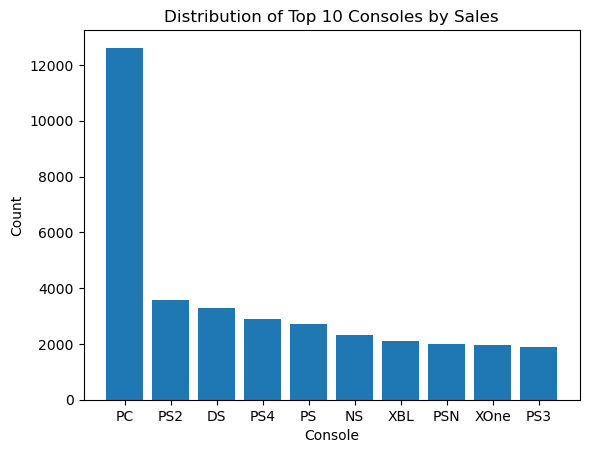

In [15]:
# Analyze the distribution of consoles by sales using bar plots
top_consoles = df['console'].value_counts().head(10).index
df_subset = df[df['console'].isin(top_consoles)]
plt.bar(df_subset['console'].value_counts().index, df_subset['console'].value_counts())
plt.title('Distribution of Top 10 Consoles by Sales')
plt.xlabel('Console')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

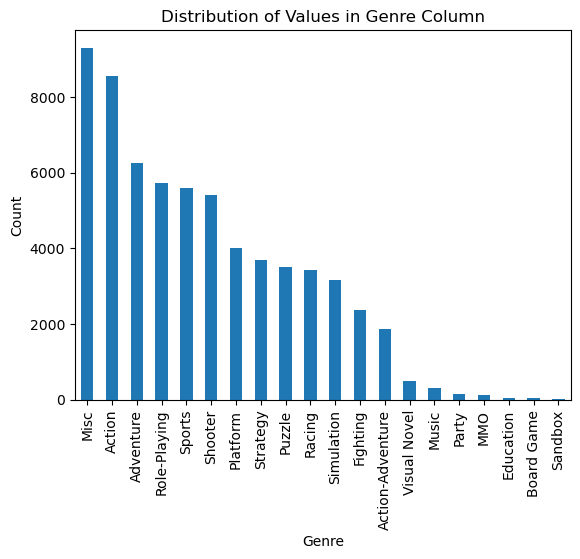

In [16]:
#analyzing the genre by total count
df['genre'].value_counts().plot(kind='bar')
plt.title('Distribution of Values in Genre Column')
plt.xlabel('Genre')
plt.ylabel('Count')

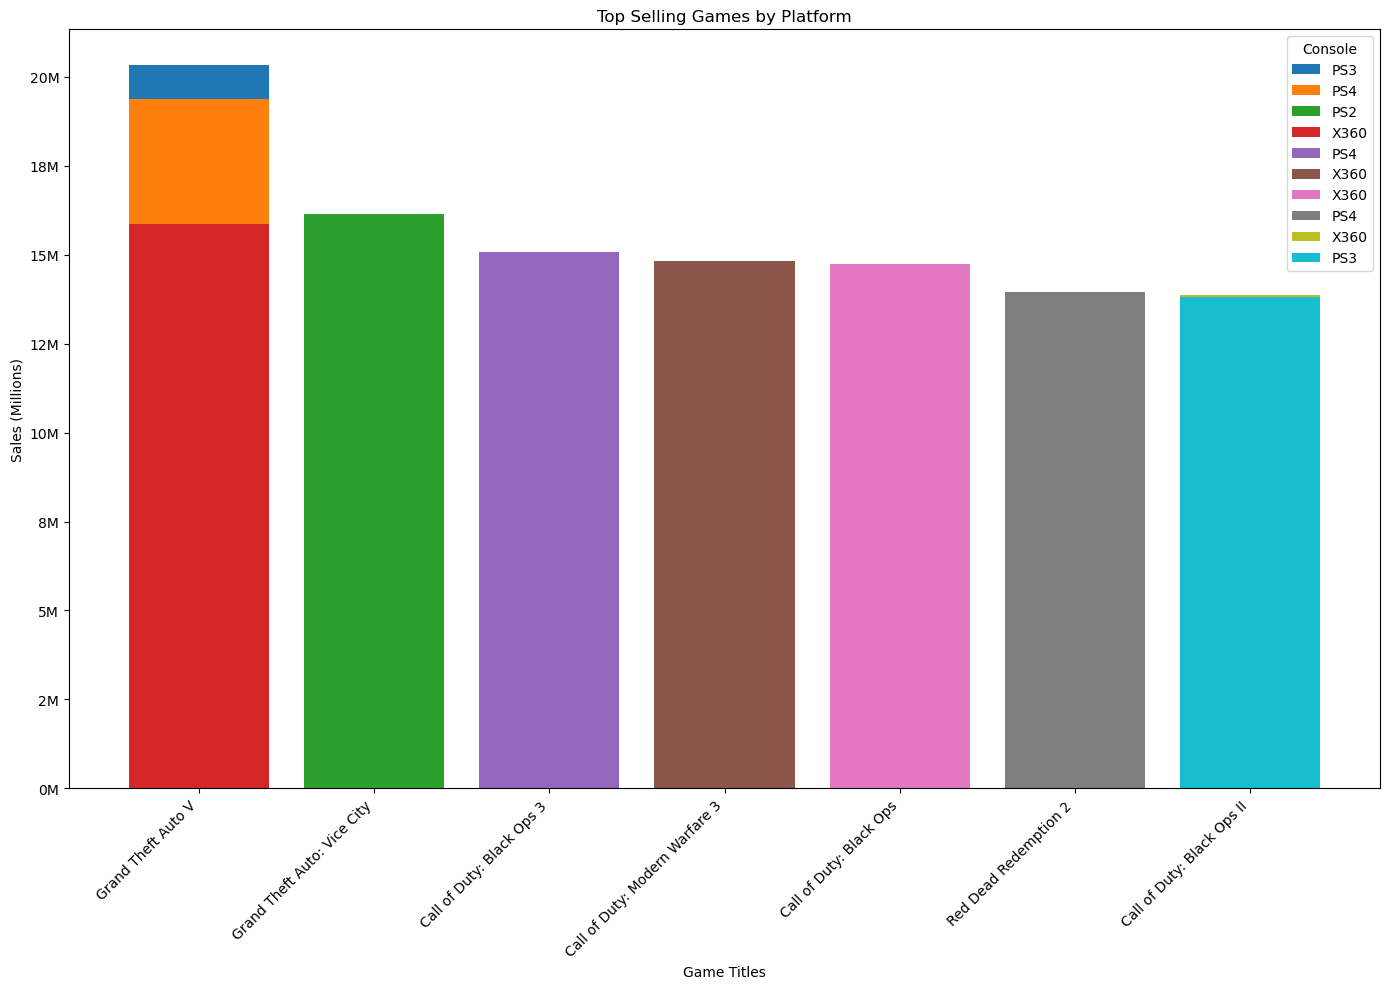

In [17]:
platforms = df.groupby(['title', 'console'])['total_sales'].sum().sort_values(ascending=False).head(10)

titles = [index[0] for index in platforms.index]
consoles = [index[1] for index in platforms.index]
sales = platforms.values
unique_consoles = np.unique(consoles)


# Convert sales to millions
sales_in_millions = sales  # dividing by 1 million to get the values in millions
#sales_in_millions = sales / 1e6  # dividing by 1 million to get the values in millions

plt.figure(figsize=(14, 10))
for i in range(len(titles)):
    console = consoles[i]
    plt.bar(titles[i], sales_in_millions[i], label=console)

plt.xlabel('Game Titles')
plt.ylabel('Sales (Millions)')
plt.title('Top Selling Games by Platform')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Console',loc='best')

# Add "Millions" to y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.tight_layout()
plt.show()

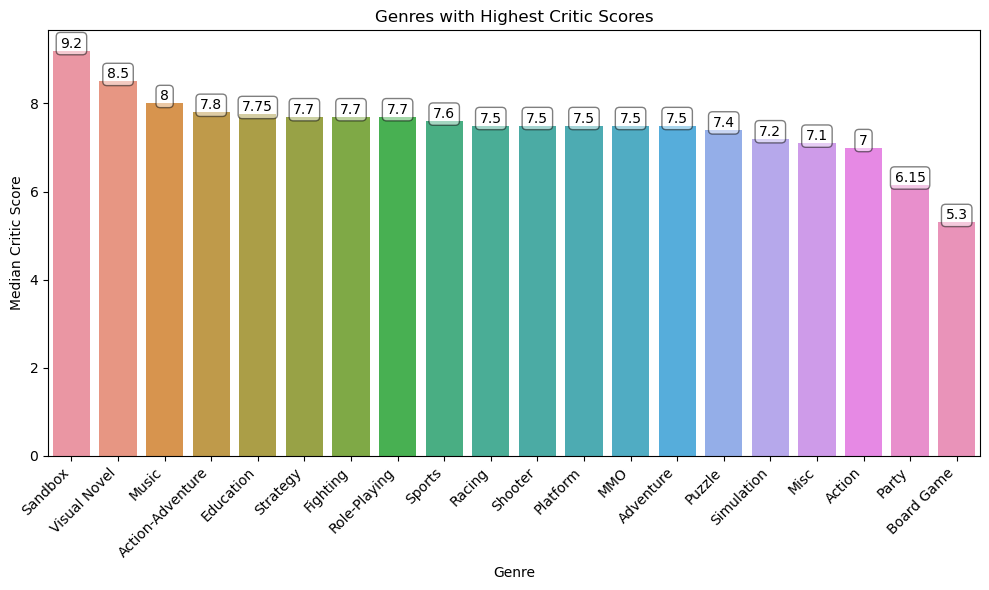

In [18]:
genre_stats=df.groupby('genre').agg({
    'critic_score':'median',
    'total_sales':'sum'
})
sorted_genres_by_score=genre_stats.sort_values(by='critic_score',ascending=False)
sorted_genres_by_sales=genre_stats.sort_values(by='total_sales',ascending=False)

plt.figure(figsize=(10, 6))
ax=sns.barplot(x=sorted_genres_by_score.index, y=sorted_genres_by_score['critic_score'])
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.title('Genres with Highest Critic Scores')
plt.xlabel('Genre')
plt.ylabel('Median Critic Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

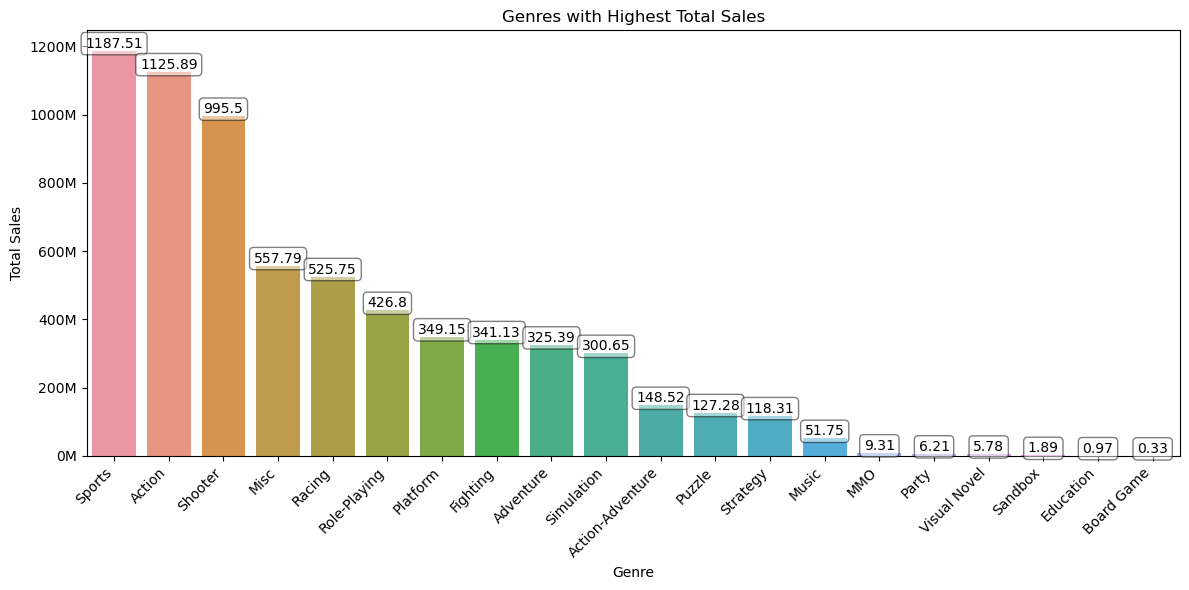

In [19]:
plt.figure(figsize=(12, 6))
ax=sns.barplot(x=sorted_genres_by_sales.index, y=sorted_genres_by_sales['total_sales'])
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, color='black', 
              bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.5))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))
plt.title('Genres with Highest Total Sales')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

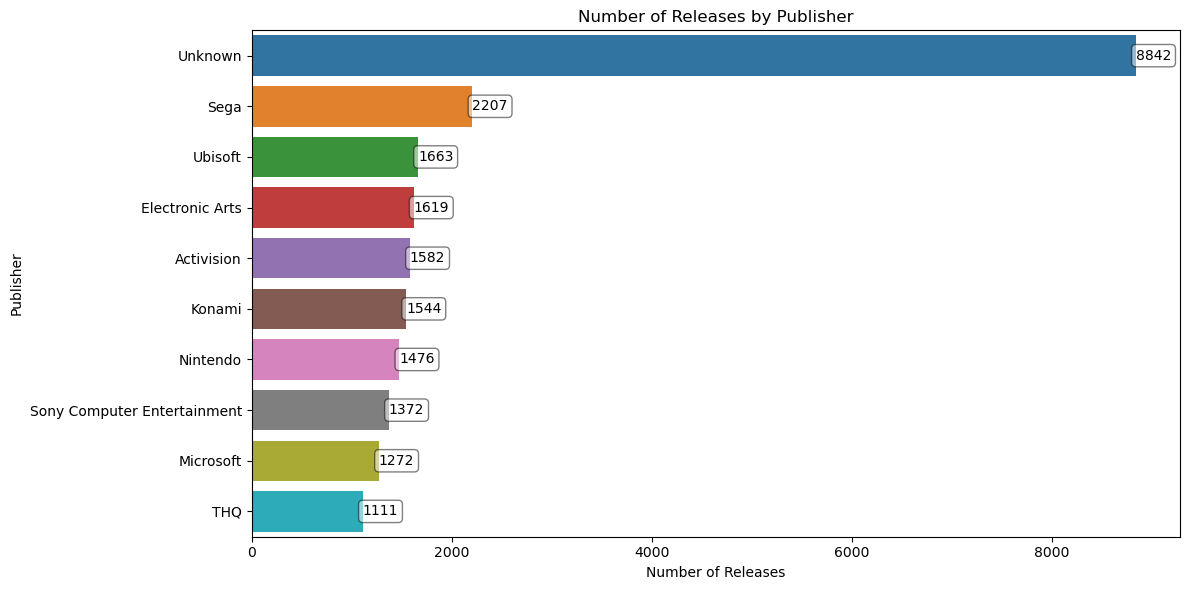

In [20]:
publisher_stats = df.groupby('publisher').agg({
    'title': 'count',
    'total_sales': 'sum'
}).reset_index()

# Sort publishers by number of releases
sorted_publishers_by_num = publisher_stats.sort_values(by='title', ascending=False).head(10)
sorted_publishers_by_sales = publisher_stats.sort_values(by='total_sales', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax=sns.barplot(x='title', y='publisher', data=sorted_publishers_by_num)
ax.bar_label(ax.containers[0],label_type='edge',fontsize=10,color='black',
            bbox=dict(boxstyle='round,pad=0.3',facecolor='white',alpha=0.5))
plt.title('Number of Releases by Publisher')
plt.xlabel('Number of Releases')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()


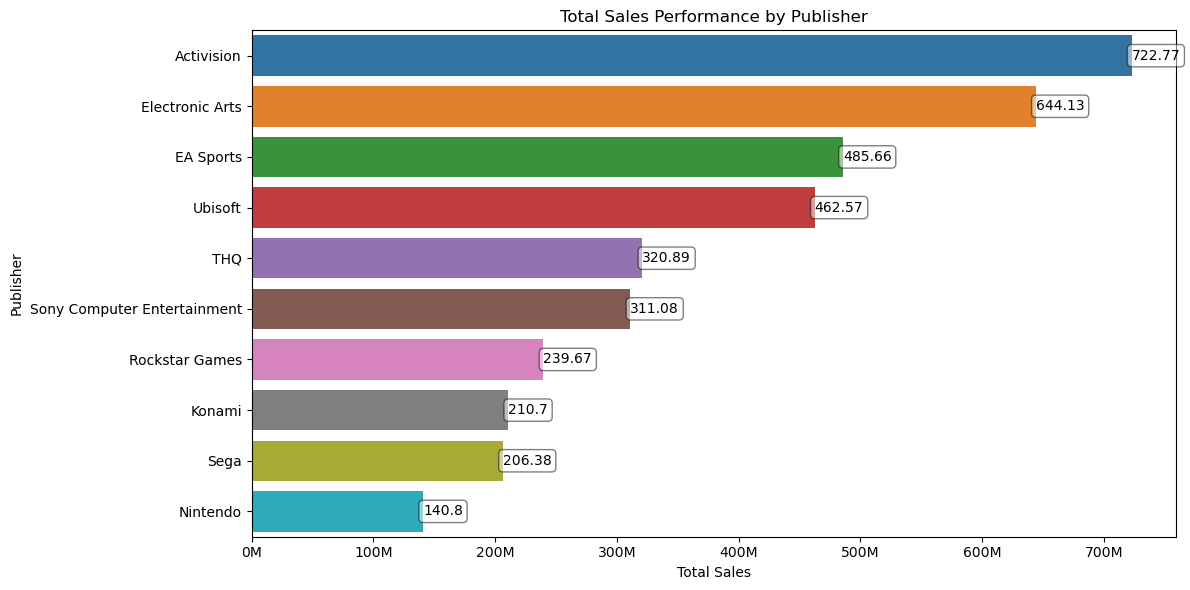

In [21]:
# Plot sales performance by publisher
plt.figure(figsize=(12, 6))
ax=sns.barplot(x='total_sales', y='publisher', data=sorted_publishers_by_sales)
ax.bar_label(ax.containers[0],label_type='edge',fontsize=10,color='black',
            bbox=dict(boxstyle='round,pad=0.3',facecolor='white',alpha=0.5))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))

plt.title('Total Sales Performance by Publisher')
plt.xlabel('Total Sales')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

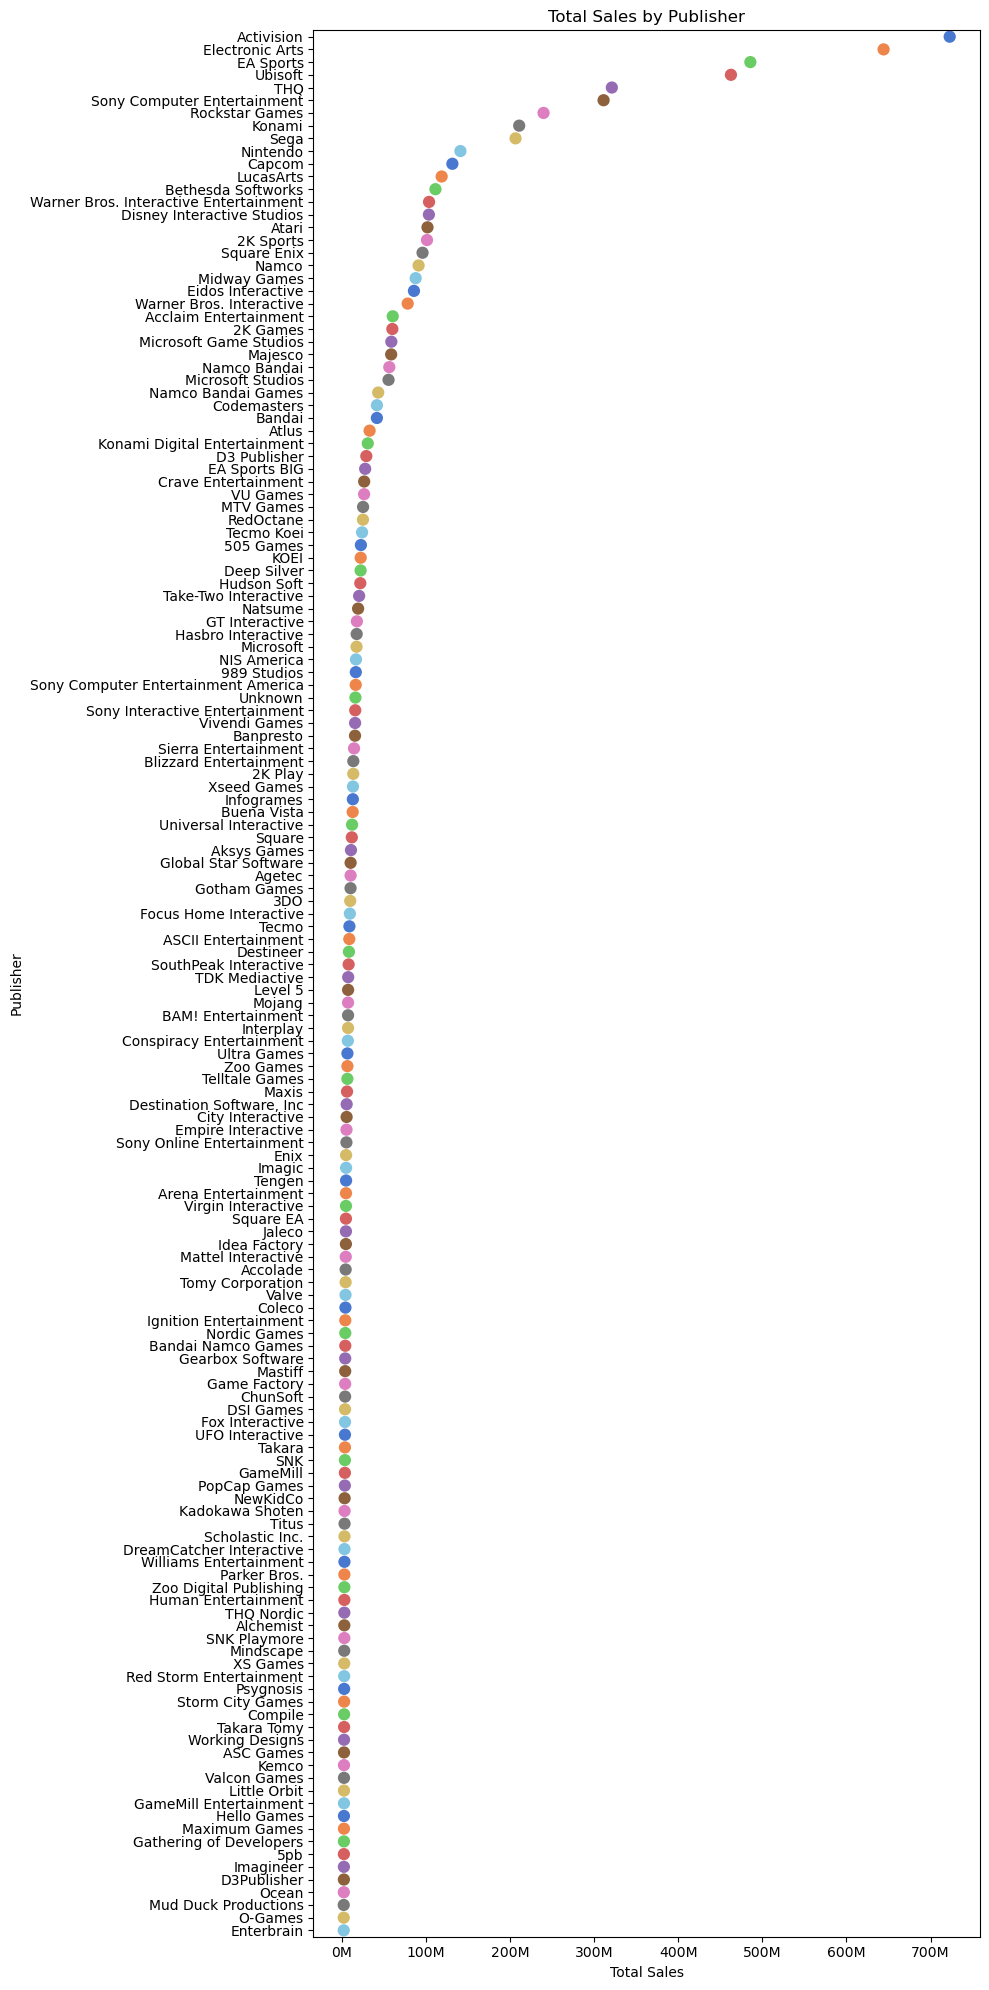

In [22]:
publisher_sales = df.groupby('publisher')['total_sales'].sum().reset_index()

# Sort publishers by total sales
sorted_publishers = publisher_sales.sort_values(by='total_sales', ascending=False).head(150)

# Plot total sales by publisher using a point plot
plt.figure(figsize=(10, 20))
ax=sns.pointplot(x='total_sales', y='publisher', data=sorted_publishers, join=False, palette='muted')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}M'))
plt.xlabel('Total Sales')
plt.ylabel('Publisher')
plt.title('Total Sales by Publisher')
plt.tight_layout()
plt.show()

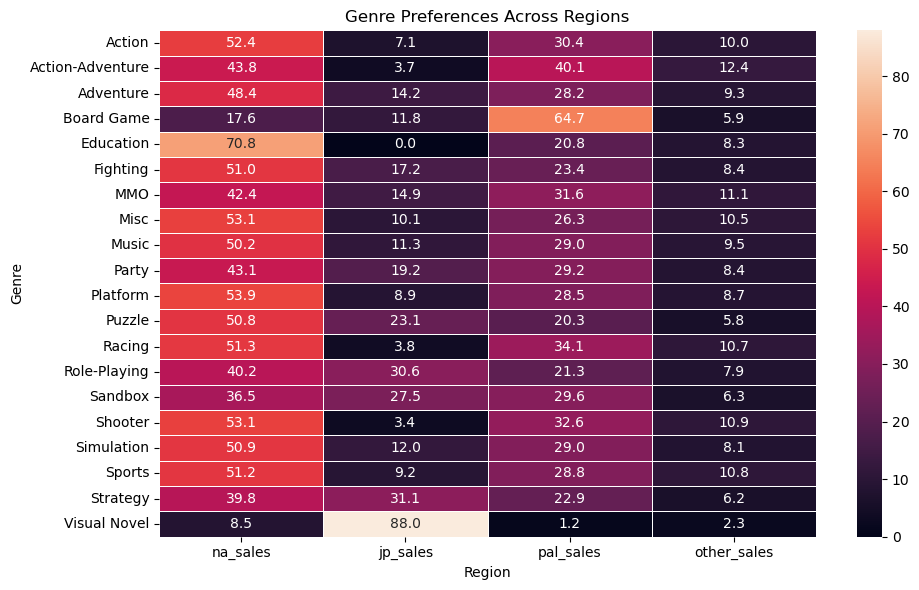

In [23]:
#analyze genre prefernce across North america, japan, Europe and Africa
genre_sales = df.groupby('genre')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

# Normalize sales data to get percentages
genre_sales_normalized = genre_sales.div(genre_sales.sum(axis=1), axis=0) * 100

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(genre_sales_normalized, cmap='rocket', annot=True, fmt='.1f', linewidths=.5)
plt.title('Genre Preferences Across Regions')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

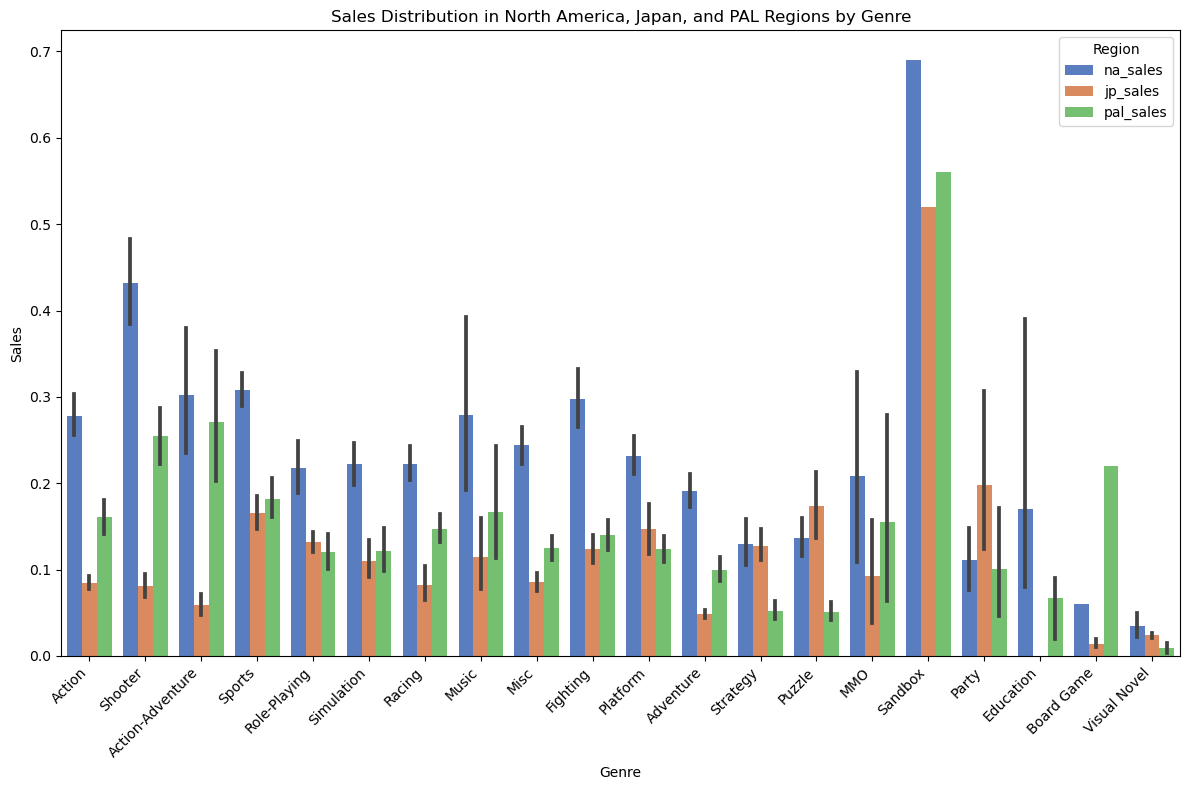

In [24]:
#Sales distribution in different regions
sales_data = df[['genre', 'na_sales', 'jp_sales', 'pal_sales']]

# Melt the DataFrame to long format for easier plotting
sales_data_melted = sales_data.melt(id_vars='genre', var_name='region', value_name='sales')

# Plot grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_data_melted, x='genre', y='sales', hue='region', palette='muted')
plt.title('Sales Distribution in North America, Japan, and PAL Regions by Genre')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', loc='upper right')
plt.tight_layout()
plt.show()

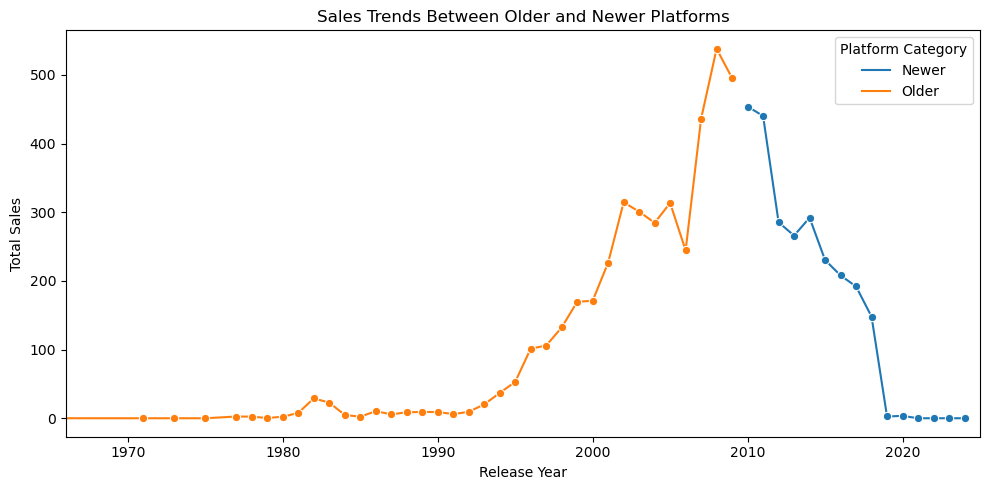

In [25]:
#sales trends for older and newer platform
threshold_release_year = 2010

df['platform_category'] = np.where(df['release_year'] < threshold_release_year, 'Older', 'Newer')
sales_trends = df.groupby(['platform_category', df['release_year']])['total_sales'].sum().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_trends, x='release_year', y='total_sales', hue='platform_category', marker='o')
plt.xlim(1966, 2025)
plt.title('Sales Trends Between Older and Newer Platforms')
plt.xlabel('Release Year')
plt.ylabel('Total Sales')
plt.legend(title='Platform Category')
plt.tight_layout()
plt.show()


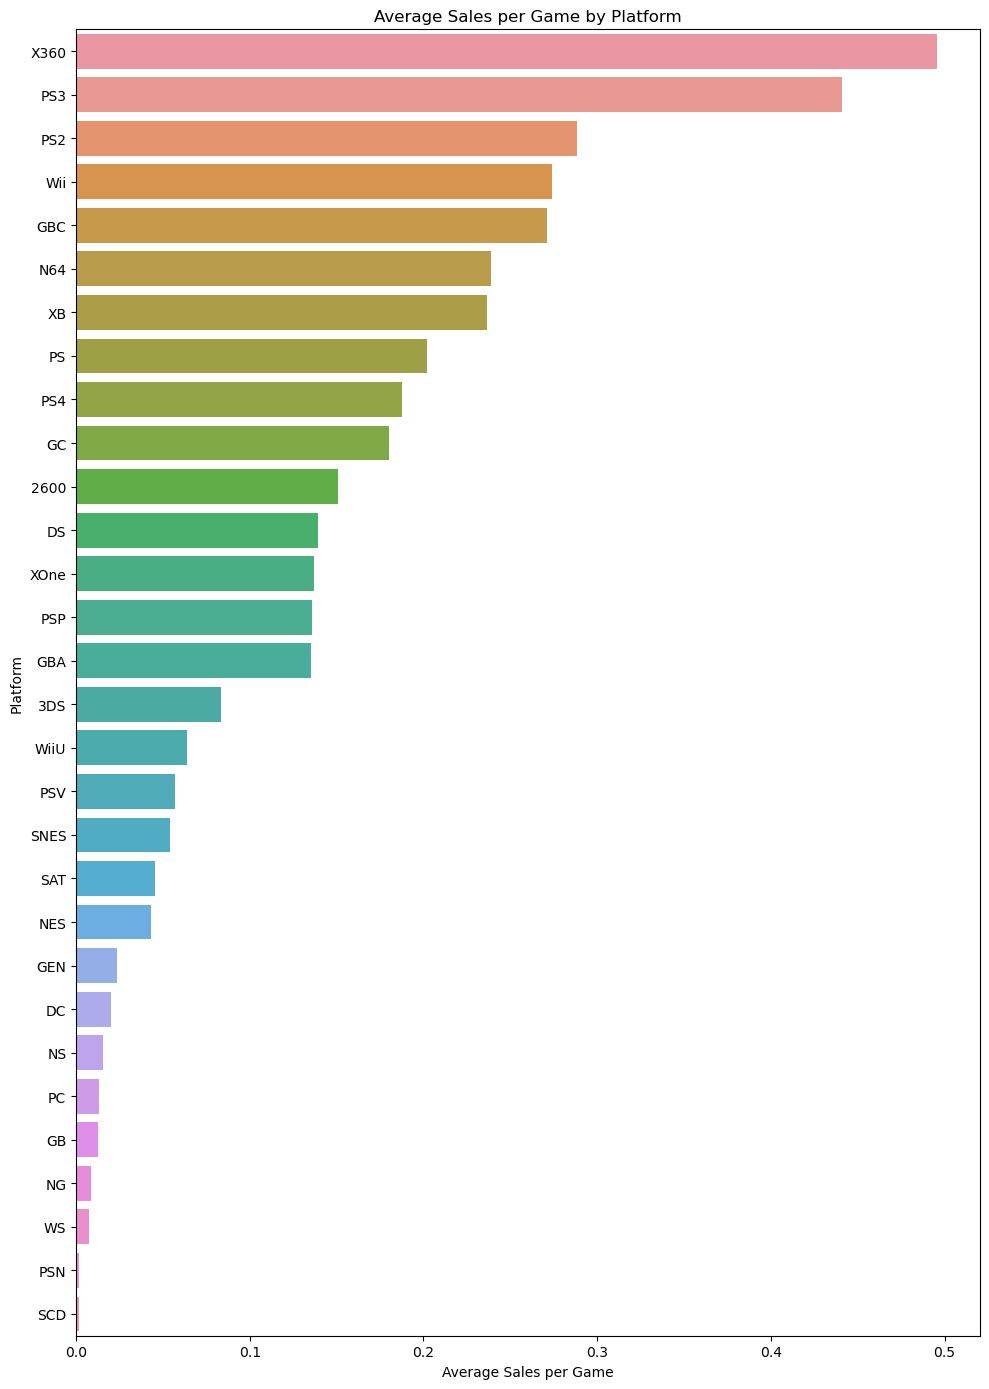

In [26]:
#average sales per game by platform
average_sales_per_game = df.groupby('console')['total_sales'].mean().sort_values(ascending=False).head(30)
plt.figure(figsize=(10, 14))
sns.barplot(x=average_sales_per_game.values, y=average_sales_per_game.index)
plt.xlabel('Average Sales per Game')
plt.ylabel('Platform')
plt.title('Average Sales per Game by Platform')
plt.tight_layout()
plt.show()

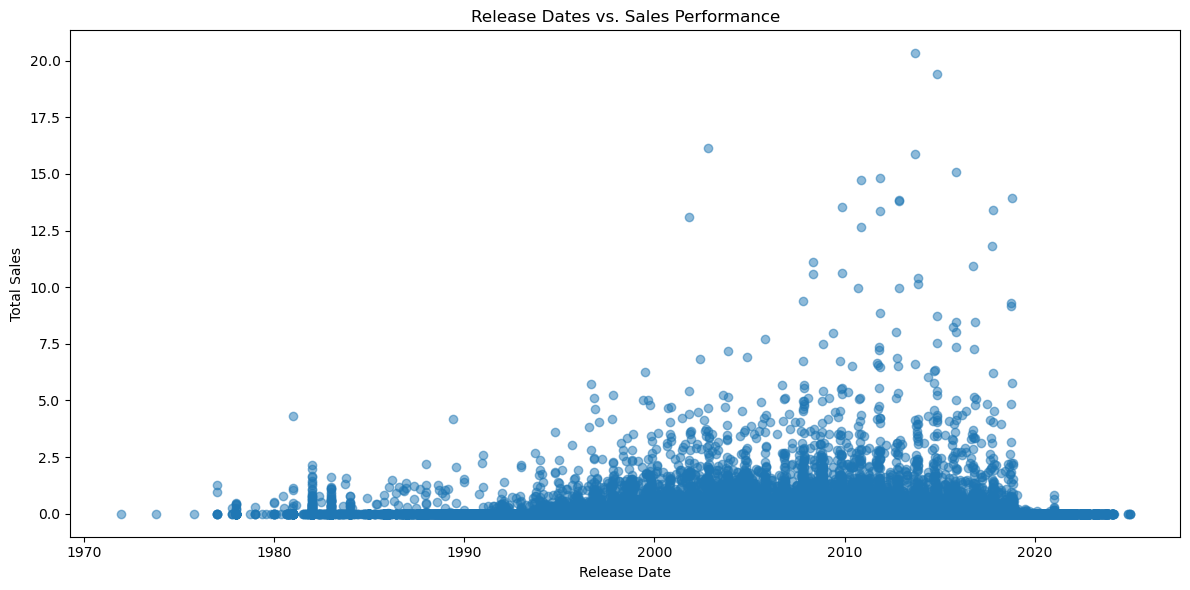

In [27]:
#release date impact
df['release_date'] = pd.to_datetime(df['release_date'])

# Plotting the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['release_date'], df['total_sales'],alpha=0.5)
plt.title('Release Dates vs. Sales Performance')
plt.xlabel('Release Date')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

In [30]:
#critic score grouped by developers
developer_stats = df.groupby('developer').agg({'critic_score': 'mean', 'total_sales': 'sum'}).reset_index()
top_10_critic_score = developer_stats.sort_values(by=['critic_score','total_sales'],kind='quicksort', ascending=[False,False])
filtered_stats = top_10_critic_score[top_10_critic_score['total_sales'] >= 10].head(10)
filtered_stats

,developer,critic_score,total_sales
6362,Rockstar Games,9.800000,19.71
4945,Mojang,9.400000,17.81
5137,Naughty Dog,9.083333,23.47
6366,Rockstar North,9.060870,116.91
7951,Ubisoft Quebec,9.050000,12.32
6374,Rocksteady Studios,9.025000,25.48
1074,Blizzard Entertainment,8.928571,13.60
1248,Bungie,8.900000,33.44
7885,Turn 10 Studios,8.900000,14.52
7374,TOSE,8.750000,16.87


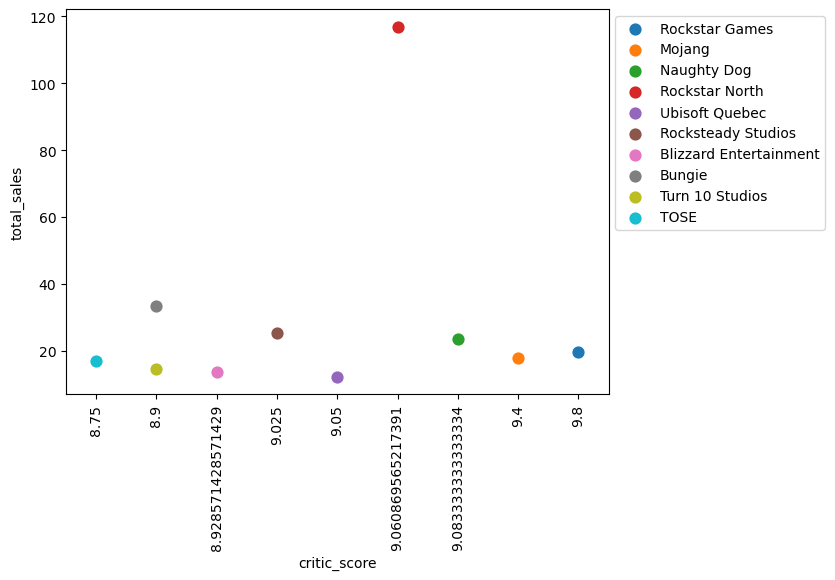

In [31]:
#top 10 developers with sales more than 10 Millon
plt.figure(figsize=(7,5))
sns.pointplot(x='critic_score',y='total_sales',hue='developer',data=filtered_stats)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.show()

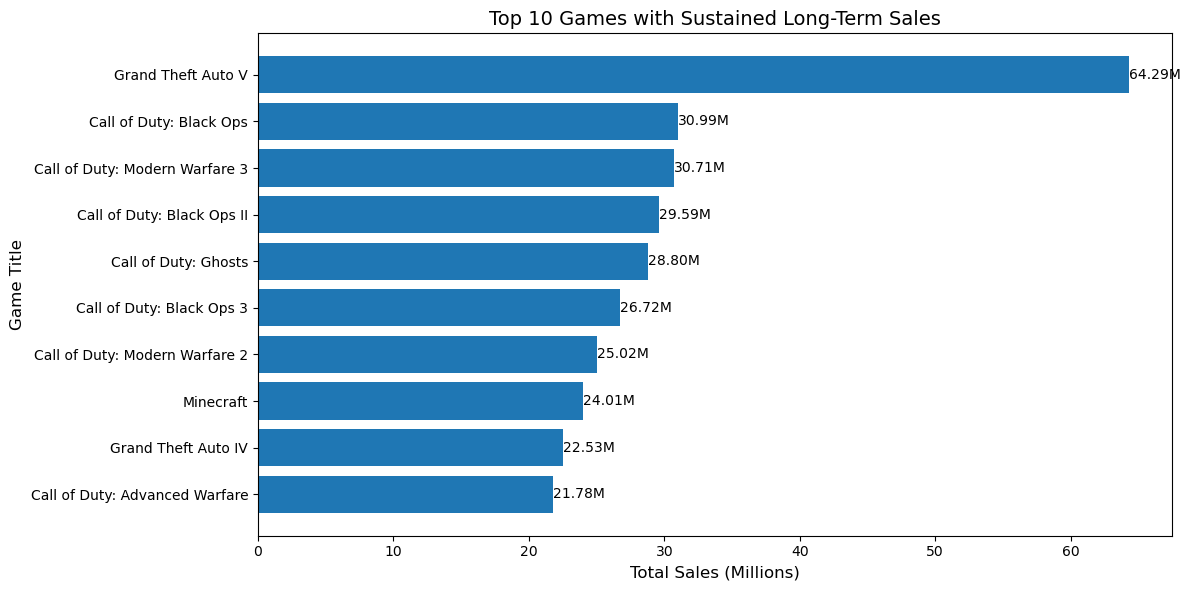

In [32]:
#games with long term sales
df['release_date'] = pd.to_datetime(df['release_date'])

long_term_period = pd.DateOffset(years=2)

df['long_term_end_date'] = df['release_date'] + long_term_period
long_term_sales = df[df['release_date'] <= df['long_term_end_date']]
long_term_sales_agg = long_term_sales.groupby('title')['total_sales'].sum().reset_index()
long_term_sales_agg = long_term_sales_agg.sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(12, 6))
top_n = 10  
plt.barh(long_term_sales_agg['title'].head(top_n), long_term_sales_agg['total_sales'].head(top_n))
plt.xlabel('Total Sales (Millions)', fontsize=12)
plt.ylabel('Game Title', fontsize=12)
plt.title(f'Top {top_n} Games with Sustained Long-Term Sales', fontsize=14)
plt.gca().invert_yaxis()  

for index, value in enumerate(long_term_sales_agg['total_sales'].head(top_n)):
    plt.text(value, index, f'{value:.2f}M', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

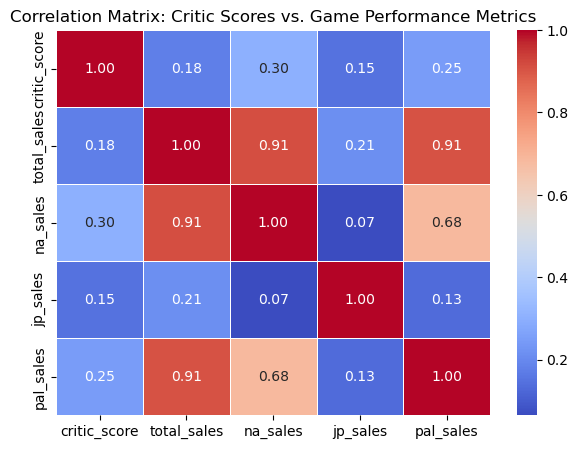

In [33]:
#correlation of critic score, total sales and regional sales
df['release_date'] = pd.to_datetime(df['release_date'])
df['last_update'] = pd.to_datetime(df['last_update'])

correlation_matrix = df[['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Critic Scores vs. Game Performance Metrics')
plt.show()

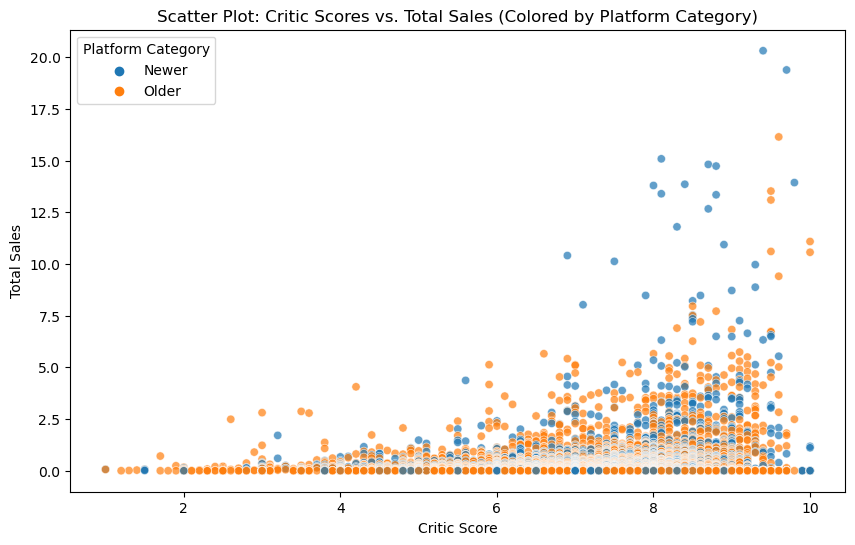

<Figure size 700x500 with 0 Axes>

In [34]:
#Critic score vs total sales grouped by platform
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='critic_score', y='total_sales', hue='platform_category',alpha=0.7)
plt.title('Scatter Plot: Critic Scores vs. Total Sales (Colored by Platform Category)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales')
plt.legend(title='Platform Category')
plt.figure(figsize=(7, 5))
plt.show()
